### Configuration

In [1]:
args = {
  'country': 'united_states',
  'currency': 'USD',
  'start_year': 1960,
  'end_year': 2020, # exclusive
  'bubble_scale': 0.5,
  'bubble_min_count': 100,
  'all': False,
}

### Libraries

In [2]:
import importlib

import constants.firm as FirmConstants
import constants.funding as FundingConstants

import models.firm as FirmModel
import models.funding as FundingModel
import models.investor as InvestorModel

import utils.file as FileUtils
import utils.dataframe as DataUtils

import utils.visual.visualiser as Visualiser
import utils.visual.firm as FirmVisuals
import utils.visual.funding as FundingVisuals
import utils.visual.industry as IndustryVisuals
import utils.visual.macro as MacroVisuals

### Load Data

#### Load Investor Data

In [3]:
# Read Investor Data
investors = FileUtils.read_pickle(f"investors")

In [4]:
# Get Public Funded Investors
public_funded_investors = InvestorModel.get_public_funded_investors(investors)

#### Load Company Data

In [5]:
# Read Company Data
firms = FileUtils.read_pickle(f"{args['country']}_firms")

In [6]:
# Read Domain Data
domain_created_year = FileUtils.read_pickle('domain_created_year')

In [7]:
# Update Company Data
firms = FirmModel.enrich_founded_year(firms, domain_created_year)
firms = FirmModel.enrich_public_funded(firms, public_funded_investors)
firms = FirmModel.filter_for_profit(firms)
firms = FirmModel.filter_founded_year(firms, args['start_year'], args['end_year'])
firms = firms.reset_index(drop=True)

#### Load Funding Data

In [8]:
# Read Funding Data
funding = FileUtils.read_pickle(f"funding")

In [9]:
# Update Funding Data
funding = FundingModel.enrich_public_funded(funding, public_funded_investors)
funding = FundingModel.filter_announced_year(funding, args['start_year'], args['end_year'])
funding = FundingModel.filter_currency(funding, 'USD')


#### Load Macro Data

In [10]:
# Read Macro Data
real_gdp = FileUtils.read_pickle('real_gdp')
fed_rate = FileUtils.read_pickle('fed_rate')

In [11]:
# Update Macro Data
real_gdp = real_gdp['United States']
real_gdp = real_gdp[real_gdp.index >= args['start_year']]
real_gdp = real_gdp[real_gdp.index < args['end_year']]

fed_rate = fed_rate['Fed Rate']
fed_rate = fed_rate[fed_rate.index >= args['start_year']]
fed_rate = fed_rate[fed_rate.index < args['end_year']]

In [21]:
importlib.reload(MacroVisuals)
# Store Macro Data
macro = MacroVisuals.Macro(real_gdp, fed_rate)

### Macro

In [13]:
if args['all']:
  macro.plot()

### Companies: All

In [14]:
if args['all']:
  FirmVisuals.plot(firms, macro)
  FirmVisuals.plot_macro(firms, macro)
  FirmVisuals.plot_STEM(firms, macro)
  FirmVisuals.plot_STEM_macro(firms, macro)
  FirmVisuals.plot_public_funded(firms, macro)
  FirmVisuals.plot_public_funded_macro(firms, macro)
  # FirmVisuals.stack_STEM_public_funded(firms)

### Companies: By Industry Group

4
60
60
2015    38.705882
2016    21.119593
2017    11.904762
2018    -1.814768
2019   -11.344806
dtype: float64
Year
2015    0.083333
2016    0.315000
2017    0.953333
2018    1.871667
2019    2.133333
Name: Fed Rate, dtype: float64

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0714  , p=0.7904  , df_denom=51, df_num=1
ssr based chi2 test:   chi2=0.0756  , p=0.7834  , df=1
likelihood ratio test: chi2=0.0755  , p=0.7835  , df=1
parameter F test:         F=0.0714  , p=0.7904  , df_denom=51, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3919  , p=0.6779  , df_denom=48, df_num=2
ssr based chi2 test:   chi2=0.8654  , p=0.6487  , df=2
likelihood ratio test: chi2=0.8584  , p=0.6510  , df=2
parameter F test:         F=0.3919  , p=0.6779  , df_denom=48, df_num=2


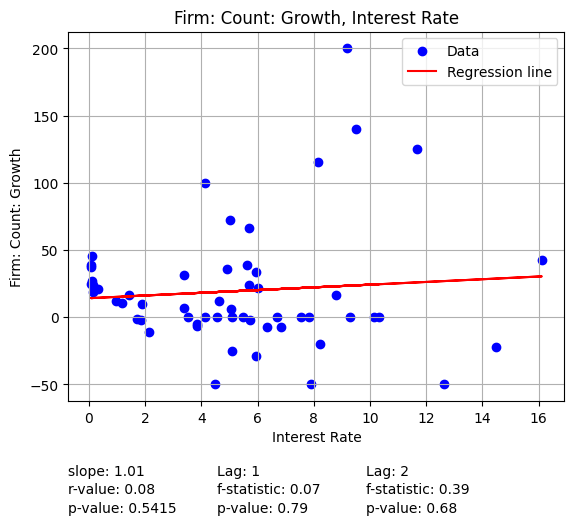

In [31]:
FirmVisuals.plot_industry_group(firms, 'Artificial Intelligence (AI)', macro)


In [ ]:
IndustryVisuals.visualise_industry_group(firms, 'Biotechnology', fed_rate)

In [ ]:
IndustryVisuals.IndustryVisuals.IndustryVisuals.IndustryVisuals.IndustryVisuals.IndustryVisuals.IndustryVisuals.IndustryVisuals.IndustryVisuals.IndustryVisuals.IndustryVisuals.visualise_industry_group(firms, 'Sustainability', fed_rate)

In [ ]:
IndustryVisuals.visualise_industry_group(firms, 'Blockchain and Cryptocurrency', fed_rate)

In [ ]:
IndustryVisuals.IndustryVisuals.IndustryVisuals.IndustryVisuals.visualise_industry_group(firms, 'Science and Engineering', fed_rate)

In [ ]:
IndustryVisuals.visualise_industry_group(firms, 'Administrative Services', fed_rate)

In [ ]:
IndustryVisuals.IndustryVisuals.IndustryVisuals.IndustryVisuals.visualise_industry_group(firms, 'Financial Services', fed_rate)

In [ ]:
IndustryVisuals.visualise_industry_group(firms, 'Manufacturing', fed_rate)

### Funding: All

In [ ]:
funding_year_count, funding_year_count_growth = DataUtils.get_year_count(funding, FundingConstants.year_label)
funding_year_sum, funding_year_sum_growth = DataUtils.get_year_sum(funding, FundingConstants.year_label, FundingConstants.raised_label)

Visualiser.plot(funding_year_count, 'Funding: Count', 'Count', year_start=1990, highlight=recessions)
Visualiser.plot(funding_year_count_growth, 'Funding: Count: Growth', 'Growth', year_start=1990, highlight=recessions)
Visualiser.plot(funding_year_sum, 'Funding: Money Raised', 'Sum', year_start=1990, highlight=recessions)
Visualiser.plot(funding_year_sum_growth, 'Funding: Money Raised: Growth', 'Growth', year_start=1990, highlight=recessions)

### Funding: STEM and Public Funded

In [ ]:
# funding_STEM_year_sum_percent = DataUtils.get_STEM_year_percent(funding, FundingConstants.year_label, FundingConstants.raised_label)
# funding_public_year_sum_percent = DataUtils.get_public_funded_year_percent(funding, FundingConstants.year_label, FundingConstants.raised_label)
# funding_STEM_public_funded_year_sum_percent = DataUtils.get_STEM_public_year_percent(funding, FundingConstants.year_label, FundingConstants.raised_label)

# Visualiser.stack(funding_STEM_year_sum_percent, 'STEM Funding: Sum: Percent', '%', STEM_stack_labels, colors=STEM_colors, year_start=1990)
# Visualiser.stack(funding_public_year_sum_percent, 'Public Funding: Sum: Percent', '%', public_funded_stack_labels, colors=public_funded_colors, year_start=1990)
# Visualiser.stack(funding_STEM_public_funded_year_sum_percent, 'STEM Public Funding: Sum: Percent', '%', ['Not STEM Private Funded', 'STEM Private Funded', 'Not STEM Public Funded', 'STEM Public Funded'], colors=STEM_public_year_percent_colors, year_start=1990)
FundingVisuals.stack_STEM_public_funded(funding)

In [ ]:
macro.regression(funding_year_sum_growth)

### Funding: By Industry